In [1]:
import numpy as np
import matplotlib.pyplot as plt
from labwork import *

In [2]:
nu = np.arange(1, 11) * 1e-9
freqs = np.array([12.4, 9.08, 7.38, 6.31, 5.71, 5.25, 4.83, 4.57, 4.28, 4.08]) * 1e3

nu, freqs


(array([  1.00000000e-09,   2.00000000e-09,   3.00000000e-09,
          4.00000000e-09,   5.00000000e-09,   6.00000000e-09,
          7.00000000e-09,   8.00000000e-09,   9.00000000e-09,
          1.00000000e-08]),
 array([ 12400.,   9080.,   7380.,   6310.,   5710.,   5250.,   4830.,
          4570.,   4280.,   4080.]))

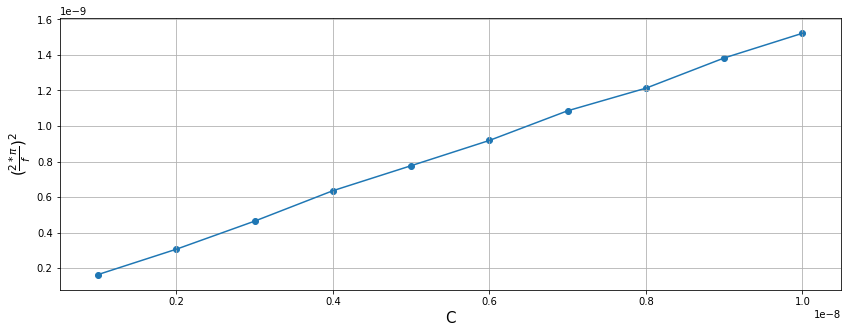

In [3]:
plt.figure(figsize=(14, 5))
y = (1./(2. * np.pi * freqs)**2)
a, b, sigma_a, sigma_b = eval_mnk(nu , y)
# plt.plot([nu.min(), nu.max()], b * np.array([nu.min(), nu.max()]) + a)
plt.plot(nu, y)
plt.scatter(nu, y)
plt.xlabel("C", fontsize=15)
plt.ylabel(r"$(\frac{2*\pi}{f})^2$", fontsize=15)
plt.grid()
plt.show()

In [4]:
print("L [мГн] = ", b* 1e3)

L [мГн] =  151.339220699


In [5]:
f_resonance = 7.37

In [6]:
# АЧХ
f = np.array(
    [7.38, 7.44, 7.50, 7.55, 7.6 , 7.66, 7.7 , 7.75, 7.8 , 7.32, 7.29, 7.26, 7.23, 7.2 , 7.15, 7.85]
)
uy = np.array(
    [7.4 , 7.  , 6.55, 6.  , 5.4 , 4.8 , 4.4 , 4.2 , 3.8 , 6.6 , 5.4 , 4.8 , 3.8 , 3.4 , 2.8 , 3.4]
)  # 20 мВ # 7.4 = 7.1
ux = np.array(
    [6.  , 6.  , 6.  , 6.  , 6.  , 6.  , 6.  , 6.  , 6.  , 6.  , 6.  , 6.  , 6.  , 6.  , 6.  , 6.]
)  #0.1 В

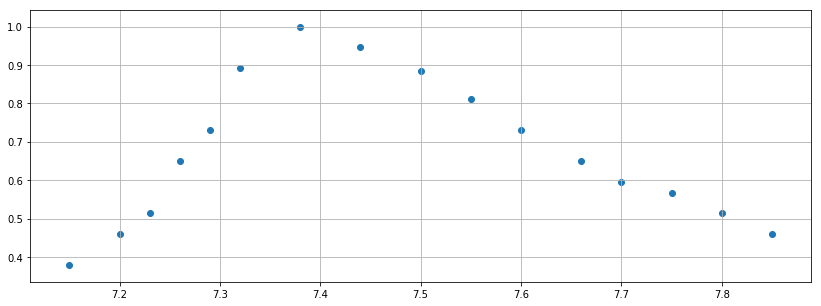

In [7]:
plt.figure(figsize=(14, 5))
plt.scatter(f, uy / uy.max())
plt.grid()
plt.show()

___________________________________________
### lab 2.1

In [69]:
T = 7.8 / 6
T_RE = 0.2 / 7.8  # 0.2 - цена деления

sciPrintR(T, T_RE, "T =")
ts_re = np.array([
    [6. , 0],
    [4.6 , 30],
    [3.9 , 60],
    [3.2 , 90],
    [2.5, 120],
    [2.2, 150],
    [2.  , 180],
    [1.8 , 210],
    [1.65, 240]
]) # 0.5 ms

ts_re_1 = np.array([
    [6.1 , 0],
    [4.9 , 30],
    [3.6 , 60],
    [3.4 , 90],
    [2.6, 120],
    [2.3, 150],
    [2.15, 180],
    [2.08, 210],
    [2.02, 240]
])  # 0.5 ms

ts_re_2 = np.array([
    [1.6, 0],
    [1.5 , 30],  # 1.3 - 1.5
    [1.2 , 60],
    [1.1 , 90],
    [1.05, 120],
])  # 1 ms

T = 1.3 +- 0.03333333333333334 ( 2.5641025641025643 %)


In [76]:
multiplier = 0.0005  # 0.5 ms
T = T * multiplier
ts_re[:, 0] = ts_re[:, 0] * multiplier 

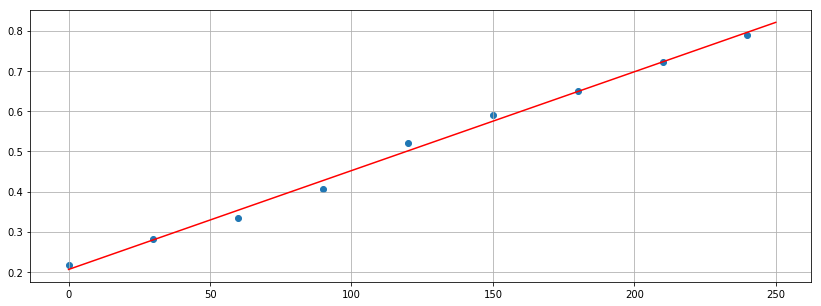

In [77]:
plt.figure(figsize=(14,5))
a, b, sigma_a, sigma_b = eval_mnk(ts_re[:, 1], T / ts_re[:, 0])

plt.plot([0, 250], b * np.array([0, 250]) + a, color="red")
plt.scatter(ts_re[:, 1], T / ts_re[:, 0])
plt.grid()
plt.show()

In [78]:
Rkr =  a / b
Rkr_RE = prodErrorR([sigma_a, sigma_b])
sciPrintR(Rkr, Rkr_RE, "Rkr = ")

Rkr =  83.9888584505 +- 0.38021556924 ( 0.452697627107 %)


In [79]:
a

0.20631776704240479

______________________
### Обработка результатовъ

In [80]:
sciPrintR(T, T_RE, "T =")

T = 0.0006500000000000001 +- 1.666666666666667e-05 ( 2.5641025641025643 %)


In [83]:
gamma = 1. / ts_re[:, 0]
lambd = gamma * T
lambd_RE = [prodErrorR([T_RE, 0.2 * multiplier / ts]) for ts in ts_re[:,0]]

In [84]:
for i in range(len(Q)):
    sciPrintR(lambd[i], lambd_RE[i], "lambd (Rk = {}) =".format(ts_re[i, 1]))

lambd (Rk = 0.0) = 0.216666666667 +- 0.0091117885927 ( 4.20544088894 %)
lambd (Rk = 30.0) = 0.282608695652 +- 0.0142649419315 ( 5.04759483731 %)
lambd (Rk = 60.0) = 0.333333333333 +- 0.0191116921154 ( 5.73350763461 %)
lambd (Rk = 90.0) = 0.40625 +- 0.0274443214953 ( 6.75552529114 %)
lambd (Rk = 120.0) = 0.52 +- 0.0436845256101 ( 8.40087030963 %)
lambd (Rk = 150.0) = 0.590909090909 +- 0.0558148749018 ( 9.44559421415 %)
lambd (Rk = 180.0) = 0.65 +- 0.067102740464 ( 10.3234985329 %)
lambd (Rk = 210.0) = 0.722222222222 +- 0.0823559510131 ( 11.4031316787 %)
lambd (Rk = 240.0) = 0.787878787879 +- 0.0976138274815 ( 12.3894473342 %)


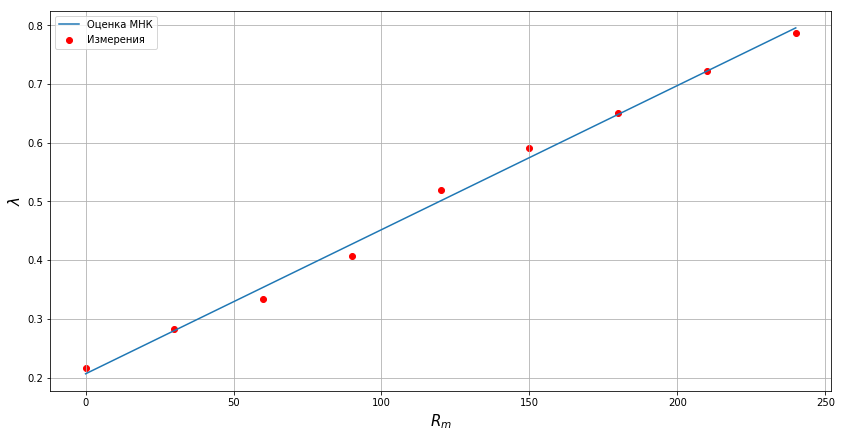

In [85]:
def linPlot(x, y, xlabel="", ylabel="", title="", figsize=(14,7), fontsize=15):
    """Строит график измерений x,y и линейное приближение
    зависимости по МНК (y = bx + a).
    Возвращает: a, b, sigma_a, sigma_b"""
    plt.figure(figsize=(14,7))
    plt.scatter(x, y, label="Измерения", color="red")
    a, b, sigma_a, sigma_b = eval_mnk(x, y)
    xs = np.array([x.min(), x.max()])
    plt.plot(xs, b*xs + a, label="Оценка МНК")
    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.title(title, fontsize=fontsize)
    plt.grid()
    plt.legend()
    plt.show()
    return a, b, sigma_a, sigma_b
    
a, b, sigma_a, sigma_b = linPlot(ts_re[:, 1], lambd, xlabel=r"$R_m$", ylabel=r"$\lambda$")

In [101]:
R_coil = a / b
R_coil_RE = prodErrorR([sigma_a, sigma_b])
sciPrintR(R_coil, R_coil_RE, "R_coil = ")

R_coil =  83.9888584505 +- 0.38021556924 ( 0.452697627107 %)


In [102]:
Q = np.pi / lambd
Q_RE = lambd_RE
for i in range(len(Q)):
    sciPrintR(Q[i], Q_RE[i], "Q (Rk = {}) =".format(ts_re[i, 1]))

Q (Rk = 0.0) = 14.4996584012 +- 0.60977456316 ( 4.20544088894 %)
Q (Rk = 30.0) = 11.1164047742 +- 0.561111073479 ( 5.04759483731 %)
Q (Rk = 60.0) = 9.42477796077 +- 0.540370363926 ( 5.73350763461 %)
Q (Rk = 90.0) = 7.7331511473 +- 0.522414981558 ( 6.75552529114 %)
Q (Rk = 120.0) = 6.04152433383 +- 0.50754062401 ( 8.40087030963 %)
Q (Rk = 150.0) = 5.31654141377 +- 0.502178928172 ( 9.44559421415 %)
Q (Rk = 180.0) = 4.83321946706 +- 0.498957340775 ( 10.3234985329 %)
Q (Rk = 210.0) = 4.34989752036 +- 0.496024542136 ( 11.4031316787 %)
Q (Rk = 240.0) = 3.98740606033 +- 0.494017573844 ( 12.3894473342 %)


$\gamma = \frac{R}{2L}$

In [103]:
L_values = (ts_re[:, 1] + R_coil) / (2.* gamma)
L = L_values.mean()
L_RE = L_values.std(ddof=1)
sciPrintR(L, L_RE, "L = ")

L =  0.13230804744 +- 0.000648692349956 ( 0.490289413612 %)


$T = 2\pi \sqrt{LC}$

In [104]:
C = (T / (2. * np.pi))**2 / L
C_RE = prodErrorR_degs([(2, T_RE), (-1, L_RE)])
sciPrintR(C, C_RE, "C = ")

C =  8.08873702641e-08 +- 4.16698505114e-09 ( 5.15158922528 %)


In [105]:
R_crit = 2. * sqrt(L/C)
R_crit

2557.895322147664

In [108]:
Q_RCL = 1. / (ts_re[:, 1] + R_coil) * sqrt(L / C)
Q_RCL_RE = prodErrorR_degs([(0.5, L_RE), (0.5, C_RE)])  # на погрешность сопротивления забили, маленькая
for i, q_rcl in enumerate(Q_RCL):
    sciPrintR(q_rcl, Q_RCL_RE, "Q_RCL (R = {})=".format(ts_re[i, 1]))

Q_RCL (R = 0.0)= 15.2275871427 +- 0.394003740905 ( 2.58743382791 %)
Q_RCL (R = 30.0)= 11.219935689 +- 0.290308411486 ( 2.58743382791 %)
Q_RCL (R = 60.0)= 8.88226821739 +- 0.229822812542 ( 2.58743382791 %)
Q_RCL (R = 90.0)= 7.35074459631 +- 0.190195652288 ( 2.58743382791 %)
Q_RCL (R = 120.0)= 6.26969370184 +- 0.162224175748 ( 2.58743382791 %)
Q_RCL (R = 150.0)= 5.46584854314 +- 0.141425214187 ( 2.58743382791 %)
Q_RCL (R = 180.0)= 4.84470317642 +- 0.125353488848 ( 2.58743382791 %)
Q_RCL (R = 210.0)= 4.35032697434 +- 0.112561831759 ( 2.58743382791 %)
Q_RCL (R = 240.0)= 3.94750506913 +- 0.102139081517 ( 2.58743382791 %)


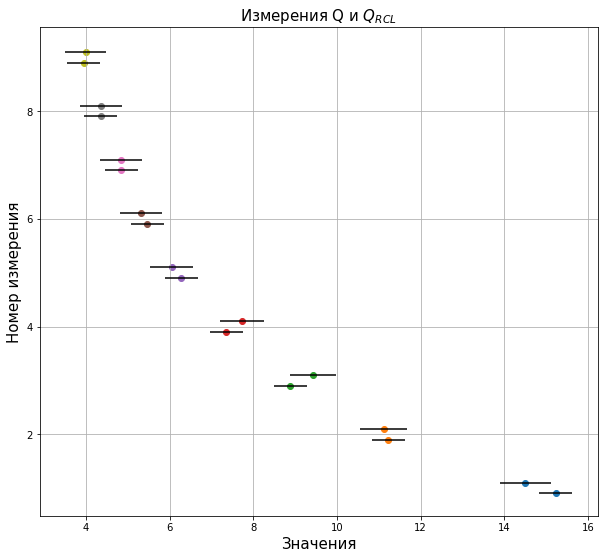

In [120]:
def plotIntervals(x, x_std, y, y_std, xlabel="Значения",
                  ylabel="Номер измерения", title="", fontsize=15):
    assert len(x) == len(x_std)
    assert len(y) == len(y_std)
    assert len(x) == len(y)
    plt.figure(figsize=(10, len(x)))
    hstep = 1
    hsmall = 0.1
    for i in range(len(x)):
        plt.hlines((i + 1) * hstep - hsmall, x[i] - x_std[i], x[i] + x_std[i])
        plt.hlines((i + 1) * hstep + hsmall, y[i] - y_std[i], y[i] + y_std[i])
        plt.scatter([x[i], y[i]], [(i + 1) * hstep - hsmall, (i + 1)*hstep + hsmall], )
    plt.grid()
    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.title(title, fontsize=fontsize)
    plt.show()

plotIntervals(Q_RCL, [Q_RCL_RE * Q_RCL] * len(Q_RCL), Q, Q_RE * Q, title="Измерения Q и $Q_{RCL}$")